In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [41]:
his_path = 'sim/2030/logs/his'
data_files = [f for f in os.listdir(his_path) if os.path.isfile(os.path.join(his_path, f))]
data_files = [f for f in data_files if '.bak' not in f]
data_files = [f for f in data_files if '.DS' not in f]
data_files

print(data_files)
RES_CONSUMP = 0.00131 # MW

df = pd.DataFrame()
for f in data_files:
    df = pd.concat([df, pd.read_csv(os.path.join(his_path, f))], ignore_index=True)
print("results from: {} generators".format(len(df.id.unique())))

df.time = pd.to_datetime(df.time)

['host_0_tracker_0.csv', 'host_0_tracker_1.csv']
results from: 24 generators


plot_from ts = 160


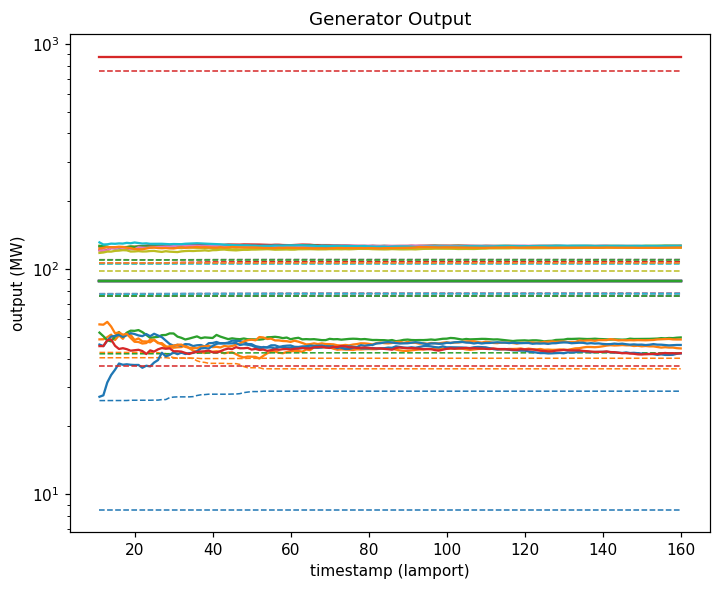

In [42]:
plot_from = df.ts.value_counts().value_counts().iloc[0]
print('plot_from ts = {}'.format(plot_from))

SETTLE_TIME = 10
_df = df[(df.ts <= plot_from) & (df.ts > SETTLE_TIME)]
index = _df.ts.unique()
index # time stamps

fig, ax = plt.subplots(figsize=(7.5,6), dpi=110)

for gen_id in df.id.unique():
    plt.plot(index, _df[_df['id'] == gen_id].output, linestyle='solid')
    plt.plot(index, _df[_df['id'] == gen_id].demand, linestyle='dashed',
             linewidth=1, color=plt.gca().lines[-1].get_color())
    
# ax.legend(df.id.unique(), fontsize=6, loc='center right', bbox_to_anchor=(1.0, 0.5))
plt.yscale('log')
ax.set_title('Generator Output')
ax.set_xlabel("timestamp (lamport)")
ax.set_ylabel("output (MW)")
    
plt.show()

In [43]:
_df.ts.max()

160

In [44]:
_df.ts.min()

11

In [45]:
x = _df.groupby('ts').get_group(11)
x

,id,ts,host,tracker,output,demand,net_cap,percent_use,time
120,-1654770793,11,0,0,52.193646,42.024890,10.168756,0.194827,2022-12-15 21:29:48.686626
121,-182766963,11,0,0,88.200000,77.756190,10.443810,0.118411,2022-12-15 21:29:48.694028
122,-23457213,11,0,0,88.200000,77.541350,10.658650,0.120846,2022-12-15 21:29:48.700970
123,-1675485352,11,0,0,88.200000,77.559690,10.640310,0.120638,2022-12-15 21:29:48.707791
124,-931280262,11,0,0,48.700849,42.608200,6.092649,0.125104,2022-12-15 21:29:48.714970
125,-1719963416,11,0,0,121.042192,106.327282,14.714910,0.121568,2022-12-15 21:29:48.713860
126,-728242845,11,0,0,88.200000,77.292450,10.907550,0.123668,2022-12-15 21:29:48.970582
127,-1293263167,11,0,0,126.564220,105.817639,20.746581,0.163921,2022-12-15 21:29:48.975087
128,-195991192,11,0,0,125.520041,110.048740,15.471301,0.123258,2022-12-15 21:29:48.978711
129,-348750876,11,0,0,88.200000,77.372360,10.827640,0.122762,2022-12-15 21:29:48.982044


In [46]:
x.time.max() - x.time.min()

Timedelta('0 days 00:00:00.328878')

In [ ]:
_df.groupby('ts').get_group(11)

Find instances where capacity was negative

find time stamps where net_cap was negative.

In [ ]:
df

In [ ]:
# deficit = t[t.percent_use < 0.15]
# surplus = t[t.percent_use > 0]

# load_to_shift = deficit.net_cap.sum()
# print('need to shift {:.1f} MW'.format(load_to_shift))
# print('{:,} homes'.format(np.ceil(load_to_shift / RES_CONSUMP).astype(int)))

# available_capacity = surplus.net_cap.sum()
# print('able to shift {:.1f} MW'.format(available_capacity))

In [ ]:
# ts = 5
# net_system_cap = supply.net_cap.sum() - deficit.net_cap.sum()
# print("at ts {} available capacity was {:.3f} MW".format(str(ts).rjust(3,"0"), net_system_cap))

Running the below code reveals that each tracker always contains spare capacity

# Changed net_cap_percentto percent_use

In [ ]:
result = pd.DataFrame()

In [ ]:
df.columns = ['id', 'ts', 'host', 'tracker', 'output', 'demand', 'net_cap', 'percent_use']
df.index.name = 'e_id'
df.output = np.round(df.output, 3)
safety_threshold = 0.1
for tracker in range(df.tracker.max() + 1):
    print("Tracker {}".format(tracker))
    print("===========")
    for ts in range(df.ts.max())[-3:]:
        _ = df[(df.ts == ts) & (df.tracker == tracker)].copy()
        _['s_demand'] = np.round((_.output * (1 - safety_threshold)),2)
        _['s_net_cap'] =  _['s_demand'] - _['demand']
        deficit = _[_['percent_use'] < safety_threshold].copy()
        surplus = _[_['percent_use'] > safety_threshold].copy()
        net_system_cap = surplus.net_cap.sum() - deficit.net_cap.sum()
        total_safe_capacity = (surplus.output * (1 - safety_threshold) - surplus.demand).sum()

        print("=" * 36)
        print("at ts = {}".format(str(ts).rjust(2,"0")))
#         print(_[['output','demand','s_demand','net_cap','s_net_cap','percent_use']])
        print("------------------------------------")
        print("   - total capacity was  {:.2f} MW".format(_.output.sum()))
        print("   - total demand was    {:.2f} MW".format(_.demand.sum()))  
        print("                         ---------")
        print("   - spare capacity was  {:.2f} MW    // ignoring safety factor".format(net_system_cap))
        print("------------------------------------")
        print('   - able to shift       {} MW    // considering safety factor'.format('{:.1f}'.format(total_safe_capacity).rjust(6)))
        print("------------------------------------")
        safe_load   = (_.output * (1 - safety_threshold)).sum()
        unsafe_load = (deficit.output * (1 - safety_threshold) - deficit.demand).sum()
#         load_to_shift = safe_load - deficit.demand.sum()
        print("   - 'Safe Load' was     {:.2f} MW    // considering safety factor".format(safe_load))

        if unsafe_load < 0:
        # else deficit.output - deficit.demand = (-) load must be shifted
            print("   - 'Unsafe Load' was   {} MW    // need to shift".format('({:.1f})'.format(abs(unsafe_load)).rjust(6, " ")))
            homes_to_shift = np.ceil(np.abs(unsafe_load) / RES_CONSUMP).astype(int)
            surplus['s_net_cap'] = (surplus.output * (1 - safety_threshold)) - surplus.demand
            deficit['s_net_cap'] = (deficit.output * (1 - safety_threshold)) - deficit.demand
            surplus['share_of_net'] =  surplus['s_net_cap'] / surplus['s_net_cap'].sum()
            deficit['share_of_net'] =  deficit['s_net_cap'] / deficit['s_net_cap'].sum()
            surplus['new_load'] = -1 * np.round((surplus['share_of_net'] * unsafe_load) / RES_CONSUMP) * RES_CONSUMP
            deficit['new_load'] = -1 * surplus['new_load'].sum() * deficit['share_of_net']
            s = surplus['percent_use'].sort_values(ascending=True)

            print('   - Load shifting to   {} homes // {:,.1f} MW shifted'.format('{:,}'.format(homes_to_shift).rjust(7),
                                                                                  abs(surplus.new_load.sum()),abs(surplus.new_load.sum())))

            if total_safe_capacity > np.abs(unsafe_load):
                print("------------------------------------")
                print("Success – load safely shifted")
            else:
                print("------------------------------------")
                print("FAILURE – load NOT shifted")
            # 38 char
#             print('{}// {:,.1f} MW shifted'.format("".rjust(38), ))
            if False:
                print("------------------------------------")
                print("All Data")
                _ = pd.concat([surplus,deficit])[['output','demand','net_cap','s_net_cap','share_of_net','new_load']]
                print(df)
        else:
            # if   deficit.output - deficit.demand = (+) then no load need be shifted
            print("   - 'Unsafe Load' was        0 MW    ".format(unsafe_load)) # // {:.2f}
            print("------------------------------------")
            print("NO LOAD TO SHIFT".center(36))
        if ts == 5:
            result = _
        print("=" * 36)

In [ ]:
result

In [ ]:
0.173483 + 0.118354  + 0.118354  + 0.118354  + 0.0035494 + 0.0257457 + 0.0874174 + 0.0278453 + 0.0400366 + 0.118305  +  0.168554  +  1